In [1]:
import cv2
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt
# set tesseract cmd path to tesseract ocr execute file path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

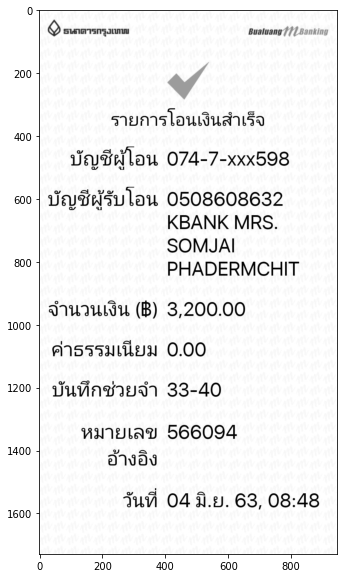

In [2]:
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

In [3]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 6')

In [4]:
print(recog_str)

@ ธนชาเตารทรุงเทพเข                                      8แลเพลทย    4     1
รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7->๐๐๕๐98
บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMUAI
PHADERMCHIT
จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง
วันที่ 04 มิ.ย. 63, 08:48



In [5]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 3')

In [6]:
print(recog_str)

(ธนาตารกรุงเทพย        ๒แลเแลทย7 778ลก

รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7-๓๐๐598

บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMIAI
PHADERMCHIT

จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง

วันที่ 04 มิ.ย. 63, 08:48



In [7]:
image = cv2.imread("images\\1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
recog_str = image_to_string(image, lang='eng', config='--psm 3')
print(recog_str)

246—0—xxx909
0508608632 KBANK



In [34]:
from pytesseract import Output
image = cv2.imread("images/slips/3 24.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
print(image.shape)
image2 = image.copy()
for i in range(n_boxes-1):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    subimg = image2[y-2:y+h+2, x-2:x+w+2]
    if h<image2.shape[0]/20:
        sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
        print(sub_str)


(1334, 750)
Krungthai

กรุงไทย

กรุงไทย

โอนเงินสําเร็จ

โอนเงินสําเร็จ

โอนเงินสําเร็จ

โอนเงินสําเร็จ

เลขอ้างอิง 018714847582

เลขอ้างอิง 018714847582

เลขอ้างอิง 018714847582

เลขอ้างอิง

018714847582

สแกนตรวจสอบ

สแกนตรวจสอบ

สแกนตรวจสอบ

สแกนตรวจสอบ

อาก                      นายรังสฤษดี์ ปีติทศพร

จาก

นายรังสฤษดี์

บปติทศพร

C                   กรุงไทย XXX—X—XX476—3

C

กรุงไทย

XXX—X—XX476—3

ไปยัง                         นาง สมใจ ผเดิมชิต

ไปยัง

นาง

สมใจ

ผเลดิมชิต

๐                  กสิกรไทย %00->%-%>%863-2


กฮิกรไทย

XXX—X—XX863—2

จํานวนเงิน                     6,400.00 uin

จํานวนเงิน

6,400.00

บาท

ค่าธรรมเนียม                         0.00 บาท

ค่าธรรมเนียม

0.00

บาท

วันที่ทํารายการ             05 n.A. 2563 14:23 u.

วันที่ทํารายการ

05

N.A.

2563

14:23

U.

วันที่รายการมีผล                   05 ก.ค. 2563

วันที่รายการมีผล                   05 ก.ค. 2563

วันที่รายการมีผล                   05 ก.ค. 2563

วันที่ราย

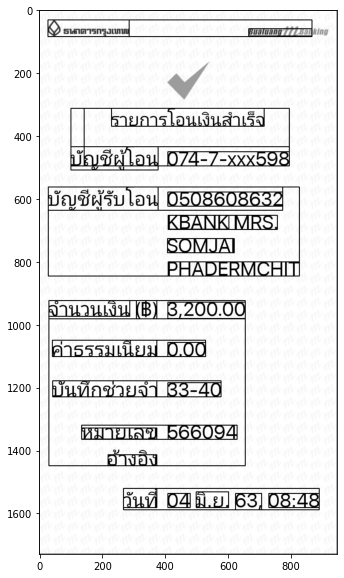

In [10]:

plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

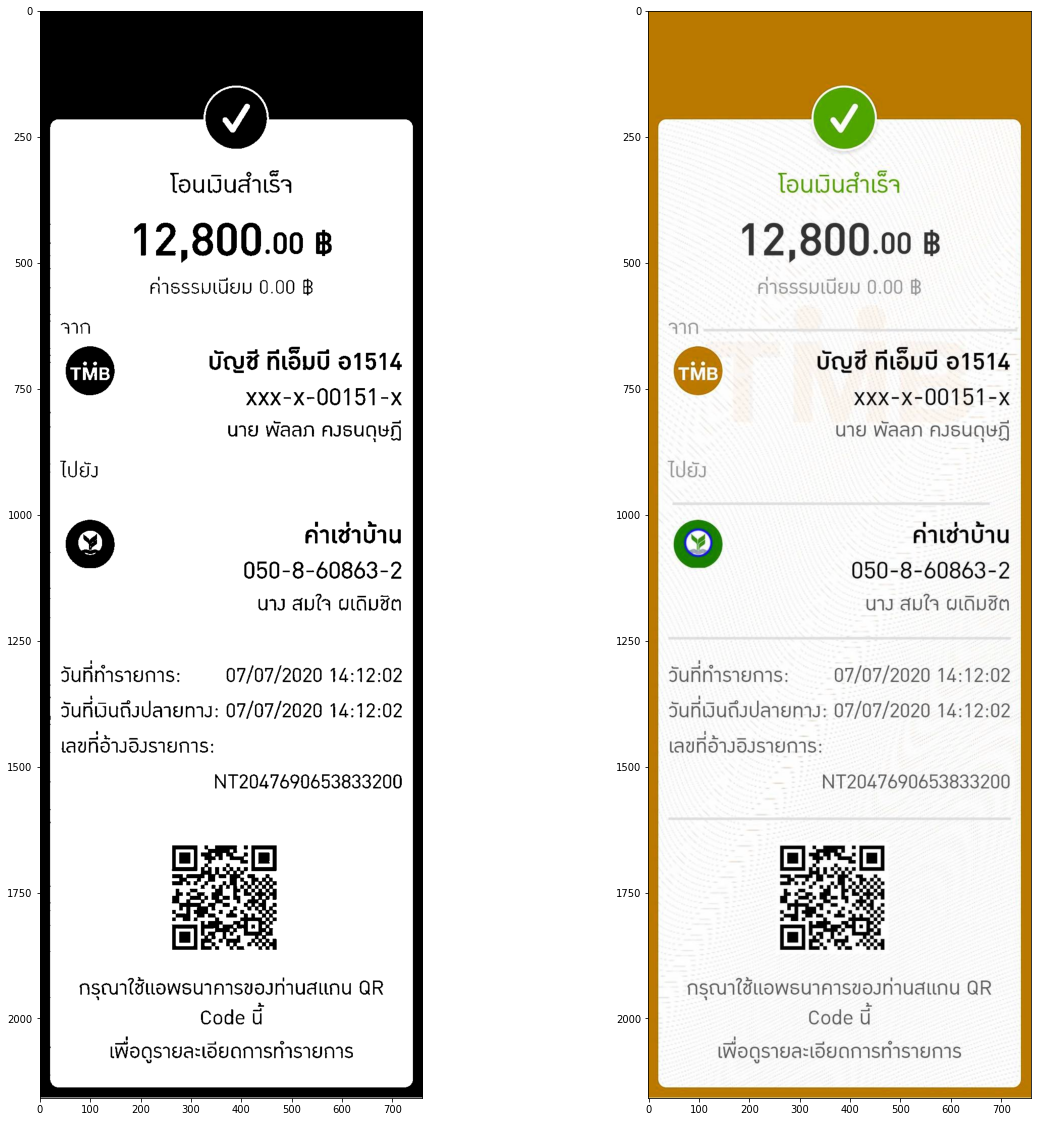

In [106]:
import easyocr
import cv2
image = cv2.imread('images/slips/83.jpg')
image2 = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
a, threshold = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(threshold,cmap='gray')
plt.subplot(122)
plt.imshow(image2)

In [107]:
reader = easyocr.Reader(['th','en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(image2, width_ths=0.7)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[249, 313], [509, 313], [509, 373], [249, 373]], 'โอนมินสำเร็จ', 0.28662407398223877), ([[175, 408], [588, 408], [588, 509], [175, 509]], '12,800.00 8', 0.6566464304924011), ([[213, 527], [547, 527], [547, 571], [213, 571]], 'ค่าธรรมเนียม o.0d b', 0.041343819350004196), ([[40, 616], [104, 616], [104, 648], [40, 648]], 'วจาก', 0.13270848989486694), ([[328, 658], [724, 658], [724, 730], [328, 730]], 'บัญชี ทีเอ็มบี อ1514', 0.2102210372686386), ([[54, 692], [146, 692], [146, 742], [54, 742]], 'tib', 0.5415005683898926), ([[402, 742], [724, 742], [724, 792], [402, 792]], 'xxx-x-00151-x', 0.24833346903324127), ([[368, 806], [722, 806], [722, 862], [368, 862]], 'นาย พัลลภ คธนดุษฎี', 0.13697384297847748), ([[35, 889], [121, 889], [121, 933], [35, 933]], 'ไปยัง', 0.39058151841163635), ([[517, 1007], [725, 1007], [725, 1069], [517, 1069]], 'ค่าเช่าบ้าน', 0.045666128396987915), ([[398, 1084], [724, 1084], [724, 1136], [398, 1136]], '050-8-60863-2', 0.9301777482032776), ([[426, 1150], [722, 11

20
โอนมินสำเร็จ
12,800.00 8
ค่าธรรมเนียม o.0d b
วจาก
บัญชี ทีเอ็มบี อ1514
tib
xxx-x-00151-x
นาย พัลลภ คธนดุษฎี
ไปยัง
ค่าเช่าบ้าน
050-8-60863-2
นาj สมใจ ผเดิมชิต
วันที่ทำรายการ:
07/07/2020 14:12:02
วันที่มินถึปปลายทาง: 07/07/2020 14:12:02
เลขทีอับอิรายการ:
nt2047690653833200
กรุณาใช้แอพธนาคารของท่านสแกน or
code นี
เพือดูรายละเอียดการทำรายการ


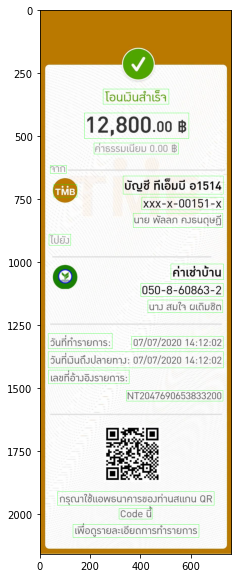

In [108]:
print(len(result))
image3 = image2.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for entry in result:
    top_left, top_right, bottom_right, bottom_left = entry[0]
    print(entry[1])
    cv2.rectangle(image3, (int(top_left[0]), int(top_left[1])), (int(bottom_right[0]), int(bottom_right[1])), (0, 255, 0), 1)
    

#     sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
#     print(sub_str)
#     cv2.putText(image2, entry[1], (top_left[0], top_left[1]), font, 1, (0, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(image3)

In [113]:
import re
# find candidate by coordinate
def find_candidate(result, entry, regex):
    print('called')
    candidate = ''
    exists = False
    top_left, top_right, bottom_right, bottom_left = entry[0]
    height = bottom_left[1] - top_left[1]
    for entry1 in result:
        top_left1, top_right1, bottom_right1, bottom_left1 = entry1[0]
        # y coordinate should be same or under of label
        if (abs(top_left1[1] - top_left[1]) < height/3 and abs(bottom_left1[1] - bottom_left[1]) < height/2):
            matched = re.search(amount_regex, entry1[1])
            if matched:
                exists = True
                candidate = matched.group(0)
    
    if exists:
        return candidate
    for entry1 in result:
        top_left1, top_right1, bottom_right1, bottom_left1 = entry1[0]
        # y coordinate should be same or under of label
        if (top_left1[1] - bottom_left[1] < 3 * height and top_left1[1] - top_left[1] > 0):
            matched = re.search(amount_regex, entry1[1])
            if matched:
                candidate = matched.group(0)
    return candidate


amount = ''
fee = ''
amount_regex = '[0-9od][0-9,.od]+'
for entry in result:
    e_text = entry[1]
    # find amount
    if 'จำนวน' in e_text:
        amount = find_candidate(result, entry, amount_regex)
        amount = amount.replace('o', '0').replace('d', '0')
    if 'ค่าธรรมเนียม' in e_text:
        fee = find_candidate(result, entry, amount_regex)
        fee = fee.replace('o', '0').replace('d', '0')        
# find date
transaction_date = ''
match_string = '[0-9]{1,2}\s*.\..\.\s*(([0-9]{4})|([0-9]{2}))'
for entry in result:
    e_text = entry[1]
    try:
        transaction_date = re.search(match_string, e_text).group(0)
        break
    except AttributeError:
        transaction_date = ''
# find time
transaction_time = ''
match_string = '[0-9]{2}\s*\:\s*[0-9]{2}(\s*\:\s*[0-9]{2})?'
for entry in result:
    e_text = entry[1]
    try:
        transaction_time = re.search(match_string, e_text).group(0)
        break
    except AttributeError:
        transaction_time = ''
# find bank name
bank_name = ''
bank_name_list = [
    {
        'en_name': 'Siam Commercial Bank', 
        'th_name' : 'ธนาคารกรุงเทพ',
        'synonyms': ['scb']
    }, 
    {
        'en_name': 'Bangkok Bank',
        'th_name': 'ธนาคารกรุงเทพ',
        'synonyms': ['Bualuang iBanking', 'ธนาคารกรุงเทพ', 'Bangkok Bank']
    }, 
    {
        'en_name': 'Krung Thai Bank',
        'th_name': 'ธนาคารกรุงไทย',
        'synonyms': ['Krungthai', 'กรุงไทย']
    },
    {
        'en_name': 'Kasikorn Bank',
        'th_name': 'ธนาคารกสิกรไทย',
        'synonyms': ['ธ.กสิกรไทย']
    },
    {
        'en_name': 'Thanachart Bank',
        'th_name': 'ธนาคารธนชาต',
        'synonyms': ['Thanachart Bank', 'ธนาคารธนชาต']
    },
    {
        'en_name': 'Krunsri Bank',
        'th_name': 'ธนาคารธนชาต',
        'synonyms': ['krungsri', 'ธนาคารธนชาต']
    }
    
]
for entry in result:
    for bank_info in bank_name_list:
        bank_synonyms = bank_info['synonyms']
#         print(bank_synonyms)
        for bank_synonym in bank_synonyms:
            e_text = entry[1]
            if  bank_synonym in e_text:
                bank_name = bank_info['en_name']
                break
        
print('amount :', amount)
print('fee :', fee)
print('transaction_date : ', transaction_date)
print('transaction_time : ', transaction_time)
print('bank name :', bank_name)

called
amount : 
fee : 0.00
transaction_date :  
transaction_time :  14:12:02
bank name : 
